In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa as lb

In [4]:
csvPath = "/content/drive/MyDrive/Masters Project/Dataset/meta.csv"
metadata = pd.read_csv(csvPath)
metadata.head()

,file_name,class_label
0,8G21258cB7t200bl2069p0s11n2.wav,ganderbal
1,c180DX25O21v8K22z9x0139020.wav,ganderbal
2,81p8122092K7j1Pkh01Q825N00.wav,ganderbal
3,5RFk8va80811G0M2u2t0c521922.wav,ganderbal
4,Y40v2K821L2a50618X2172Dg0r9d.wav,ganderbal


# Function for converting the m4a files to the wav

In [5]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
import os
formatsToConvert = [".m4a", ".mp3", '.ogg']
def convertAudio(folderName):
    for (directoryPath, directoryName, filenames ) in os.walk(folderName):
        for filename in filenames:
            if filename.endswith(tuple(formatsToConvert)):
                # get the file path
                filepath = directoryPath + "/" + filename
                #seperate the file path and extension of the file
                (path, fileExtension) = os.path.splitext(filepath)
                #replace the extension with empty string
                fileExtension = fileExtension.replace(".", "")
                #try converting
                try:
                    # get the audio file using audioSegment
                    audioFile = AudioSegment.from_file(filepath, fileExtension)
                    #replace the file extension with wav
                    wavFile = filename.replace(fileExtension, "wav")
                    #set the path of the new wav file - same as the m4a path
                    wavPath = directoryPath + "/" + wavFile
                    print("Converting in progress!!!" + str(filepath))
                    #export the new audio file in wav format
                    audioFile = audioFile.export(wavPath, format="wav")
                    #remove the old path and fiolder
                    os.remove(filepath)
                except:
                    print("Encountered an error while converting...")


In [ ]:
#run the function to do the conversion
audioFilePath = "/content/drive/MyDrive/Masters Project/Dataset/final audio/"
convertAudio(audioFilePath)

Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-05-28 at 9.40.25 AM.ogg
Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-05-28 at 9.40.25 AM (1).ogg
Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-05-28 at 9.40.26 AM.ogg
Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-05-28 at 9.40.26 AM (1).ogg
Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-05-28 at 9.40.27 AM.ogg
Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-05-28 at 9.40.27 AM (1).ogg
Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-05-28 at 9.40.27 AM (2).ogg
Converting in progress!!!/content/drive/MyDrive/Masters Project/Dataset/Audio/KUP/WhatsApp Audio 2021-

In [ ]:
# removing silence


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1080x360 with 0 Axes>

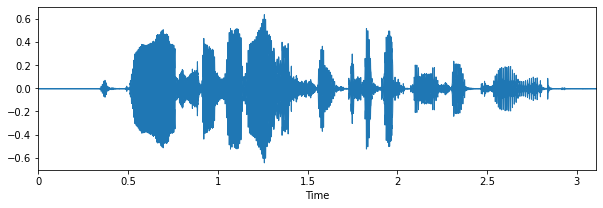

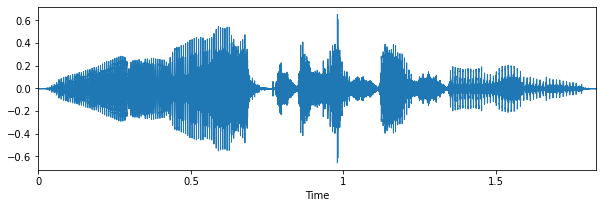

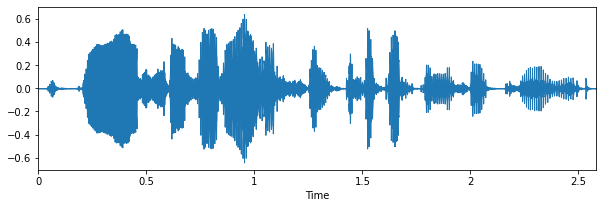

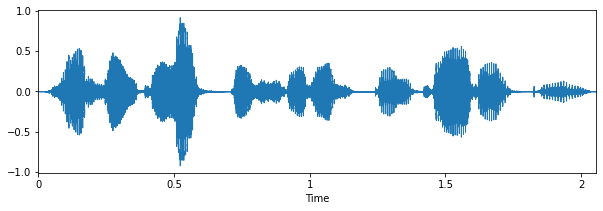

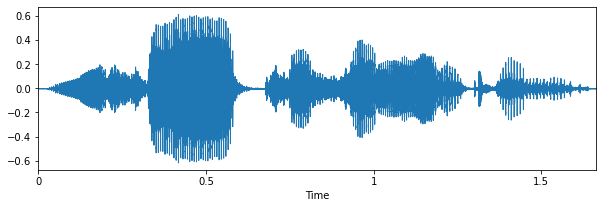

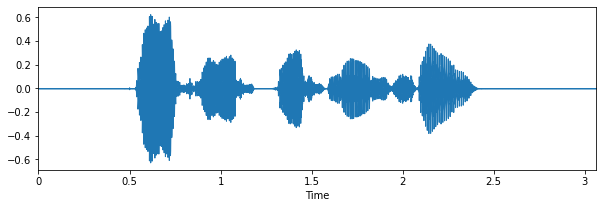

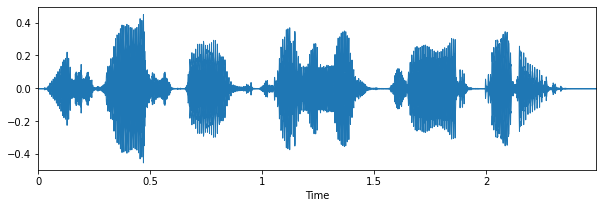

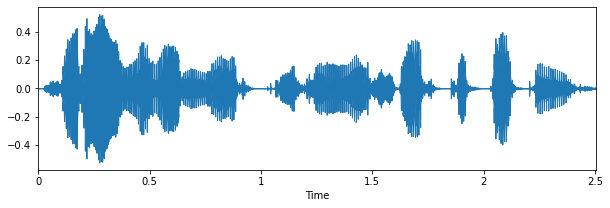

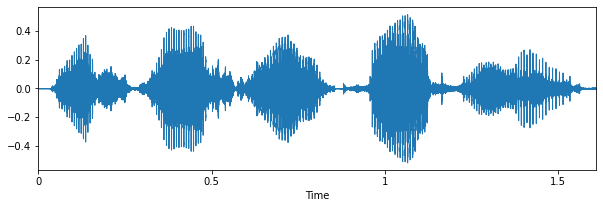

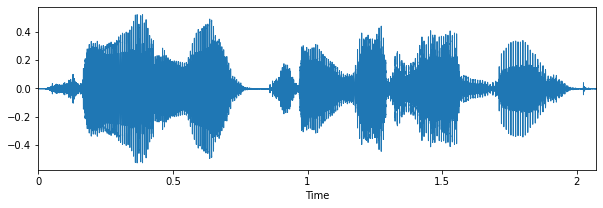

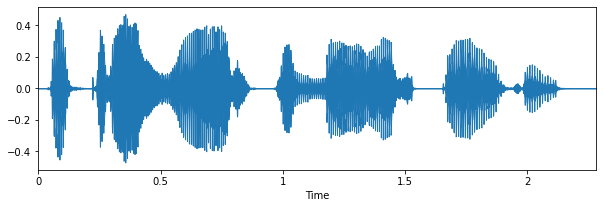

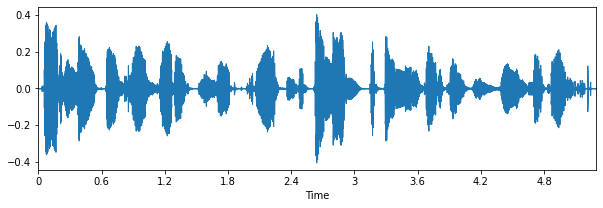

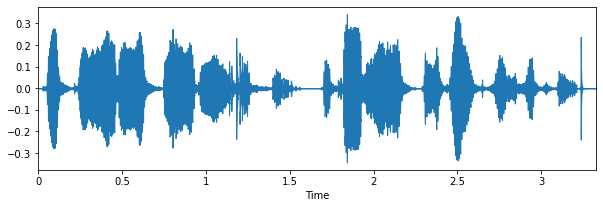

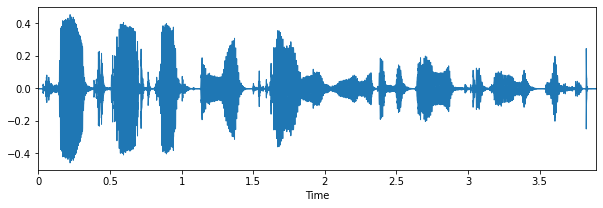

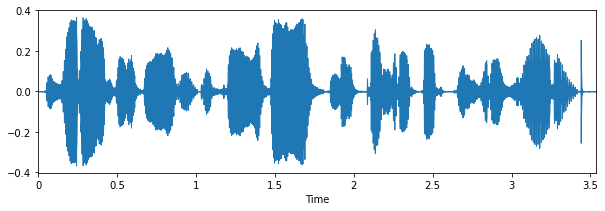

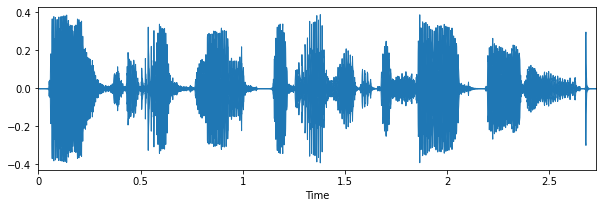

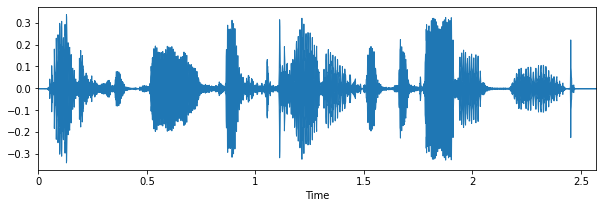

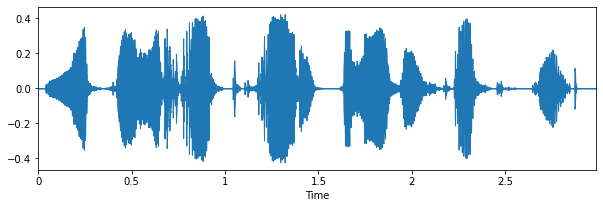

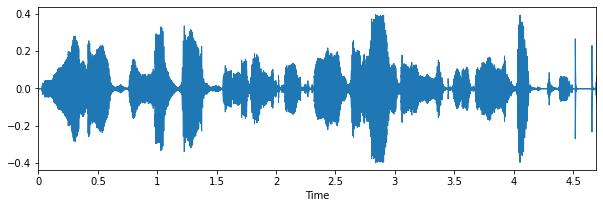

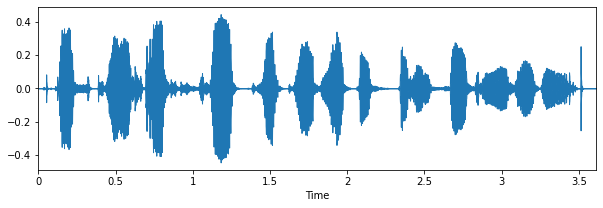

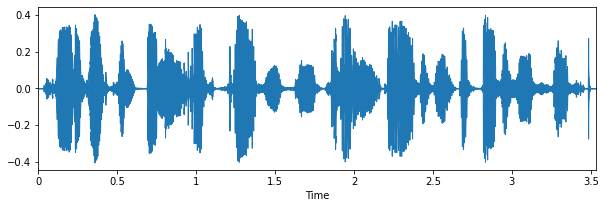

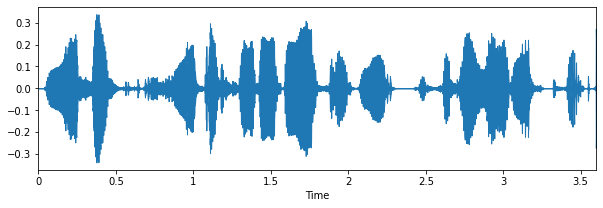

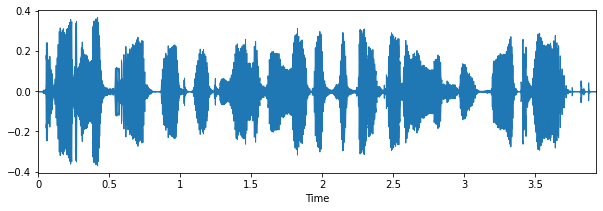

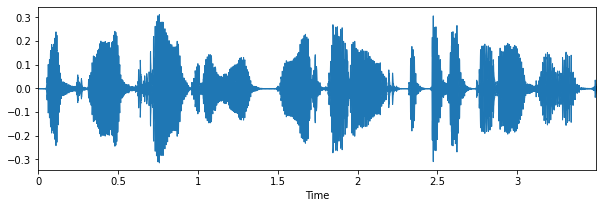

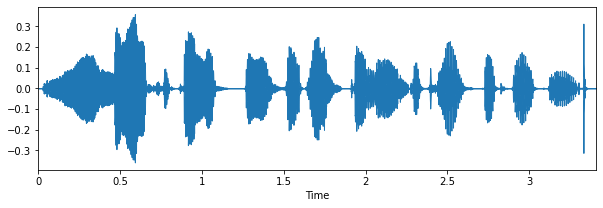

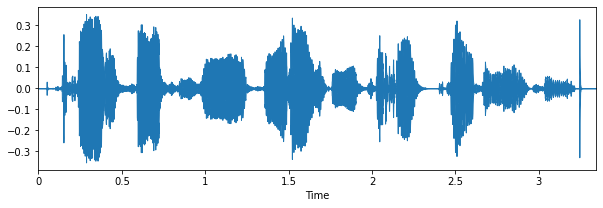

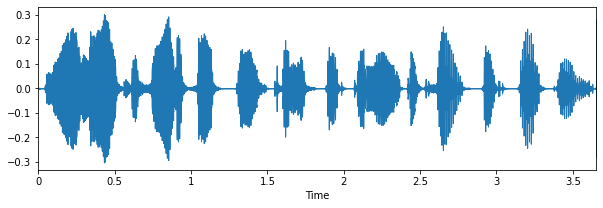

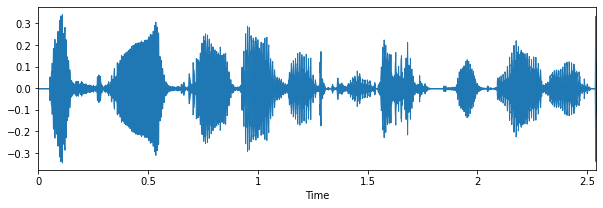

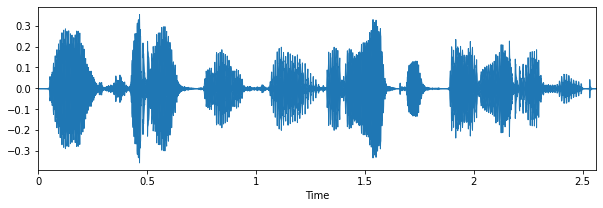

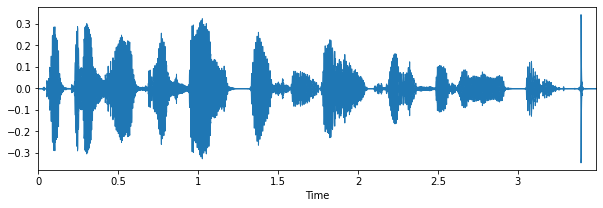

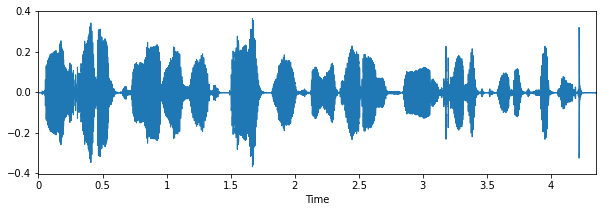

In [7]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
audioData = []
srate = []
for index, row in metadata.iterrows():
    filename = f"/content/drive/MyDrive/Masters Project/Dataset/final audio/{row['file_name']}"
    data, sampleRate = lb.load(filename)
    audioData.append(data)
    srate.append(sampleRate)
    plt.figure(figsize=(10,3))
    lb.display.waveplot(data, sampleRate)
    # ipd.Audio(f, sampleRate)
    # print(filename)
    

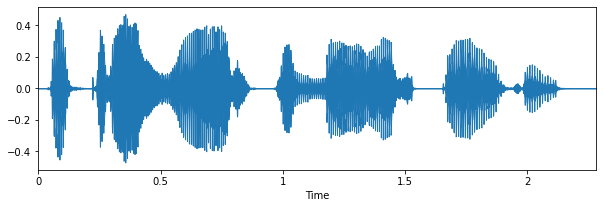

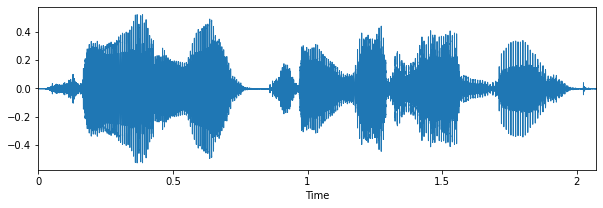

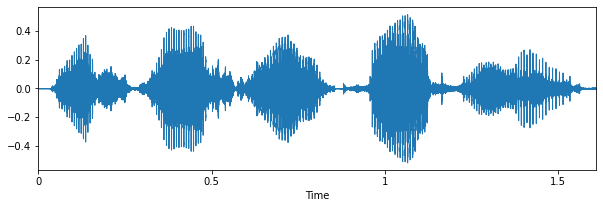

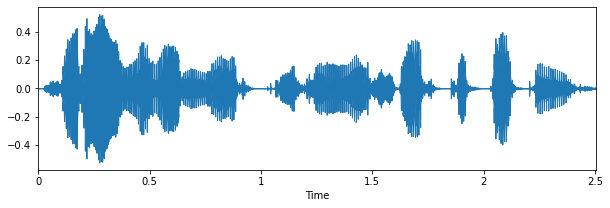

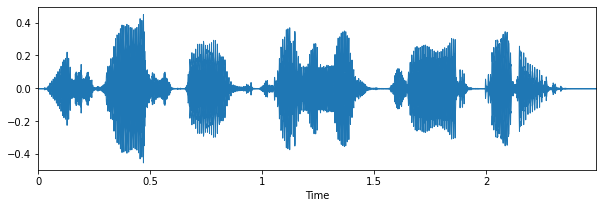

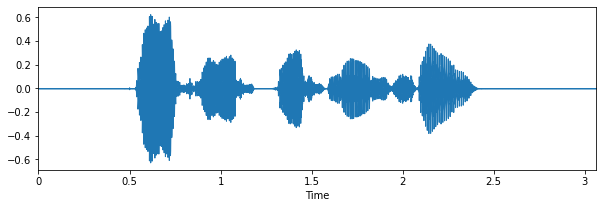

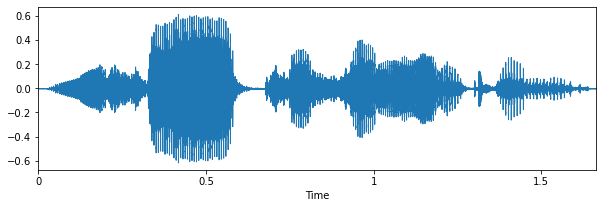

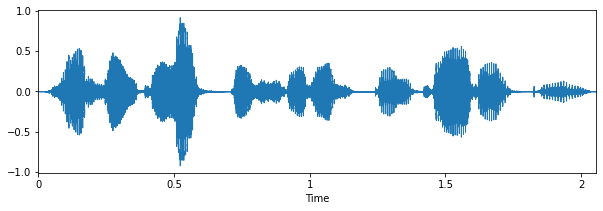

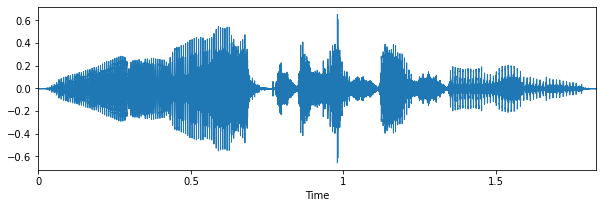

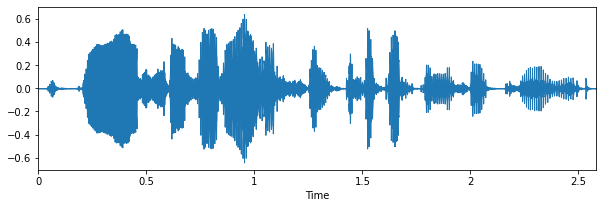

In [ ]:
for a, s in zip(audioData, srate):
    plt.figure(figsize=(10,3))
    lb.display.waveplot(a, s)

In [8]:
# extract the MFCC coeficients
for a, s in zip(audioData, srate):
    mfcc = librosa.feature.mfcc(y=a, sr=s)
    print(mfcc)

[[-5.52058228e+02 -5.52058228e+02 -5.52058228e+02 ... -5.29372498e+02
  -5.38864807e+02 -5.29546326e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.40643158e+01
   1.18993855e+01  1.32421999e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  6.80478859e+00
  -5.18714070e-01 -1.36749735e+01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.36392641e+00
   7.68526363e+00  9.13959789e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.14735764e-01
   3.62716079e+00  3.26234078e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.45183372e+00
  -2.95243073e+00 -3.93685818e+00]]
[[-5.37679321e+02 -4.80993073e+02 -3.80367798e+02 ... -3.76997101e+02
  -4.21716675e+02 -4.98363190e+02]
 [ 5.36490326e+01  9.49186707e+01  1.15006195e+02 ...  1.75642242e+02
   1.52984650e+02  9.23714600e+01]
 [ 4.55125961e+01  4.14065742e+01 -4.39726889e-01 ...  2.30470352e+01
   4.53983765e+01  5.12317238e+01]
 ...
 [-5.96746969e+00 -1.26111355e+01 -1.7138954

[-3.04399261e+02  9.24283295e+01  1.17675295e+01  2.27898808e+01
 -2.73910732e+01  7.74701071e+00 -2.15347881e+01 -2.80749464e+00
 -1.25039406e+01 -2.52076817e+00 -6.10764074e+00 -5.17207289e+00
 -8.63073921e+00 -9.54365826e+00  5.90161371e+00 -5.26275063e+00
 -6.76275349e+00 -3.80973721e+00 -2.79498029e+00 -2.82879621e-01]


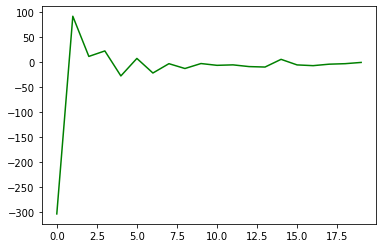

[-263.8678     113.27702      4.42195     38.75661    -15.441748
    7.206247   -22.287315    -9.591791   -20.414085    -9.487906
   -1.8302522   -5.5460706   -7.9459605   -8.455799   -10.535656
    1.5312709   -9.5074625   -6.238789    -4.010756    -3.0676587]


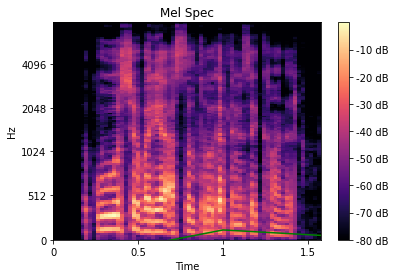

[-257.4351      108.30256      14.60987      28.73784     -32.45867
    8.733758    -27.279423     -3.8593636   -14.963292     -3.0823383
   -7.35259      -6.134252    -10.248647    -11.072055      7.483508
   -6.5545588    -8.677633     -4.920711     -3.5093026    -0.39284712]


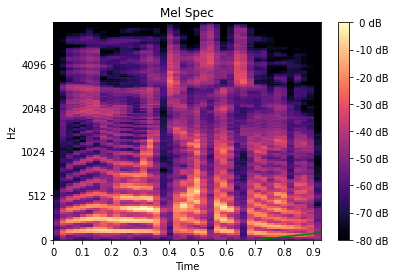

[-259.01315     99.24487      3.3806796   40.942764    -5.4468217
   15.602442   -29.38124    -12.469943   -18.331755    -6.3401895
   -9.265651   -11.339468   -12.364957    -7.086252    -4.3914933
   -2.146622    -9.879345    -4.45961     -7.9733543  -10.234742 ]


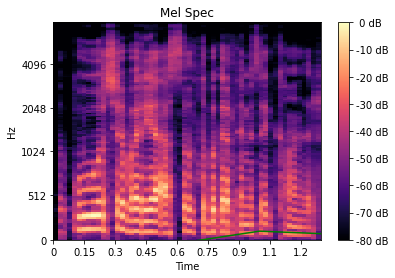

[-2.5407774e+02  8.8690308e+01  1.2461689e+01  3.2118423e+01
 -6.9996924e+00  1.4736226e+01 -2.5336849e+01 -8.2600412e+00
 -1.8836380e+01 -1.2723283e+01  1.5201569e-01 -6.0816369e+00
 -2.0511751e+01 -6.0392433e-01 -4.8098330e+00 -4.1929412e+00
 -1.1812454e+01 -4.2515936e+00 -7.3086624e+00 -3.6857028e+00]


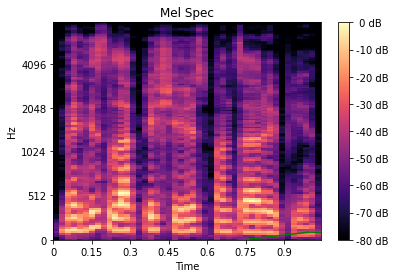

[-3.9595712e+02  6.8499855e+01  1.5653515e+01  7.4023814e+00
 -1.8469011e+01 -3.5833571e+00 -7.5625939e+00  3.6042953e+00
 -5.0195966e+00 -7.9517813e+00 -3.2005086e+00  4.0365138e+00
  1.8449072e+00 -1.0250874e+00 -5.3641000e+00 -4.2827296e+00
 -7.3063765e+00 -1.2723507e-01 -3.2704048e+00 -5.3013301e+00]


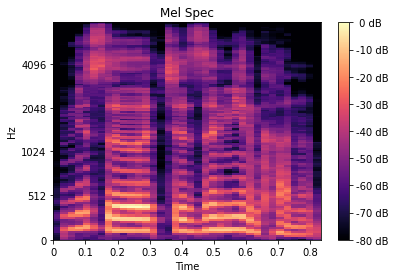

[-3.0754843e+02  8.9804840e+01  4.8680716e+00  2.9403955e+01
 -1.8607529e+00  1.5162409e+01 -3.0542185e+01 -1.0105329e+01
 -1.6269413e+01  1.6875723e-01  4.5062556e+00 -7.8507366e+00
 -8.6493826e+00 -7.8622570e+00 -5.0282679e+00  2.4879529e+00
 -5.1046715e+00 -8.1764078e+00  1.2680577e+00 -7.0719447e+00]


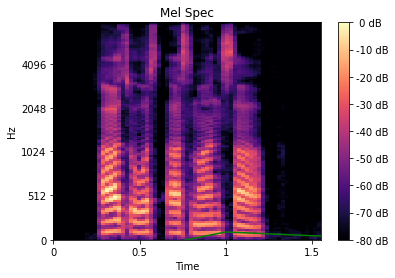

[-295.47223    118.546326     2.6246424   26.715288    -5.8767405
   -0.7054785  -26.755371    -5.467492   -25.669395    -8.099772
    7.5993104   -7.60898    -10.947257    -6.458291    -3.9599018
   -3.8416576   -6.053518    -2.858697    -3.1076126   -8.770959 ]


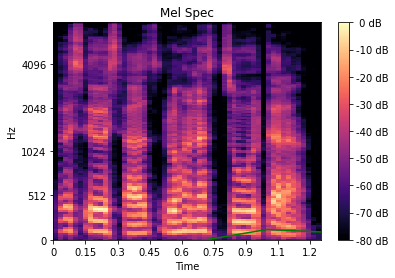

[-251.01047     109.07409      -3.5443704    20.074837     -9.201553
   12.42391     -36.817204     -7.340802    -26.9494       -2.2893372
    4.872891     -9.41966      -9.071921     -5.95577      -5.0034013
    0.39497232   -8.665024     -2.708318     -2.1622643   -11.119079  ]


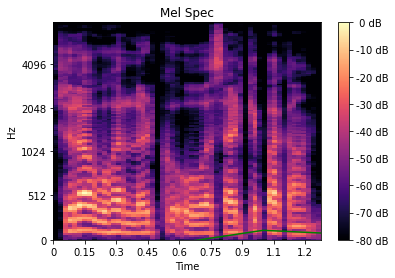

[-289.05872     119.52766       0.61751026   25.143574     -8.837141
   -4.721252    -14.853777      7.713602    -21.595467    -11.3135605
  -10.54896      -9.188004    -13.262968     -3.641518     -4.389977
    3.8128824   -13.178036     -8.076804      3.1150153    -9.982167  ]


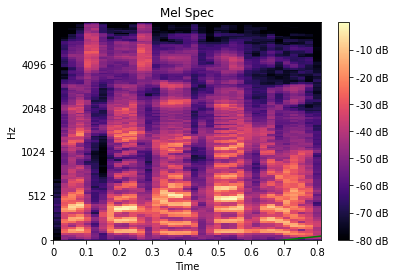

[-3.2396942e+02  1.2409280e+02  1.6034990e+01  2.0039011e+01
 -2.4941858e+01  6.4842467e+00 -1.4206708e+01  9.6147972e-01
 -1.7193151e+01 -2.1123922e+01  1.5686572e+00  6.6530337e+00
 -1.0012972e+01 -1.1402871e+01  1.8176490e+00  4.1634396e-02
 -1.1525709e+01 -2.6479018e+00 -1.7257776e+00 -1.2432575e+01]


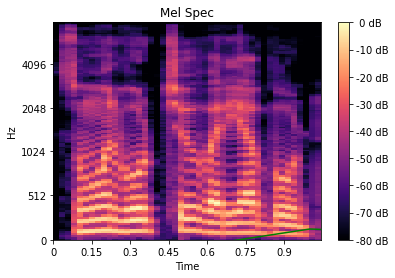

[-390.5211      180.62543      -5.516793      2.3019977     6.567244
   -5.2280602   -11.563283    -15.572148    -17.662455    -21.391142
  -20.812706     -9.506614     -0.55444604  -15.140936    -10.351906
    1.8511062   -11.458545     -8.237057      1.7761366    -6.321688  ]


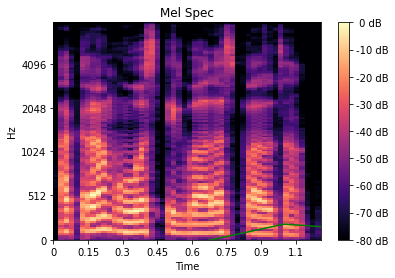

[-371.62967    161.82016     -4.6078773   -2.896142     2.4559953
    2.1517181  -23.796072    -9.590183   -12.496468   -25.909756
  -14.386455    -8.984059    -3.0187123  -15.5680275   -4.377403
    4.1849256  -15.282205    -4.2903576    4.570303    -9.683935 ]


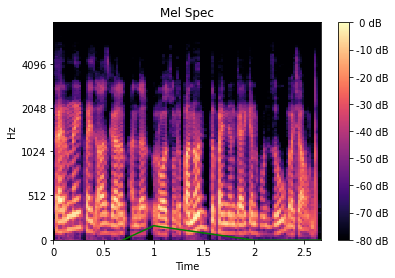

[-379.54492    177.4593      -2.8191679   -0.5414051  -17.48029
   -3.1172915   -4.4716268  -15.604026   -16.104578   -14.180715
  -17.857975   -13.148036     4.3962097  -13.7726     -11.792607
    2.192689   -12.644276    -8.8600445    1.2329321   -5.5783176]


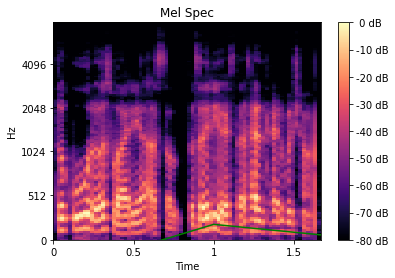

[-352.52866    170.0303       5.0439982   -9.856258    -4.635214
    1.4697664   -9.516677   -13.60132    -15.96258    -24.947203
  -19.802027    -6.603396    -3.190254   -18.655857    -9.447283
    3.3442416  -10.23286     -5.739421     2.1014884   -7.3130665]


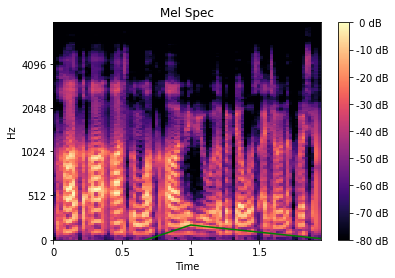

[-3.3399973e+02  1.7270935e+02 -1.5793910e+01  1.6143326e+01
 -1.7653755e+01  5.2450651e-01 -3.2728565e+00 -2.1065908e+01
 -1.6502094e+01 -1.1644840e+01 -1.6871914e+01 -1.8216129e+01
  4.1897960e+00 -1.4120145e+01 -1.6094299e+01  3.0625610e+00
 -7.9318733e+00 -7.1237040e+00 -2.4905384e-01 -3.4618547e+00]


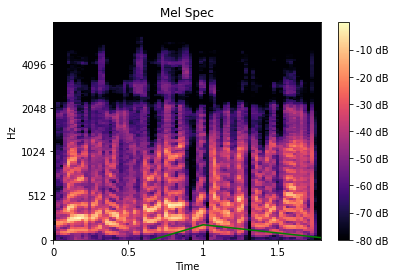

[-349.7348     164.78069    -21.628546    12.541303    -7.510857
   -1.4181966    1.0233132  -23.646404   -21.55103     -7.1905756
  -12.243056   -20.814707     0.566757    -2.873016   -15.130153
   -3.3135552   -2.8448515   -5.000076    -5.8798437   -6.6445036]


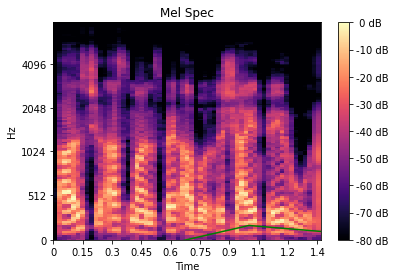

[-372.14835    163.46797     12.688458    -5.1817374  -23.390955
  -16.00804      1.3055285   -5.391433   -12.975124   -10.432856
  -15.529091   -15.787901    -1.7457838   -9.780252   -11.423452
   -1.9792622   -9.457873    -6.554552     0.7999566   -4.1110387]


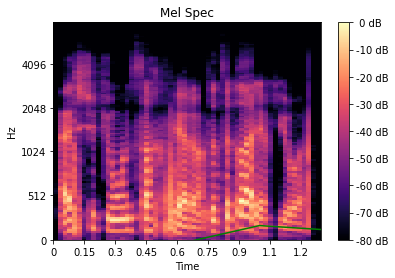

[-353.38223    171.7303     -18.709871     8.562048     2.7019374
   -6.9784756   -4.0503917  -16.425268   -19.57079    -15.821713
  -20.79855    -15.5030575    3.1384008  -13.486411   -16.105703
    2.8568256   -9.030466    -8.576657     3.536645    -3.9503734]


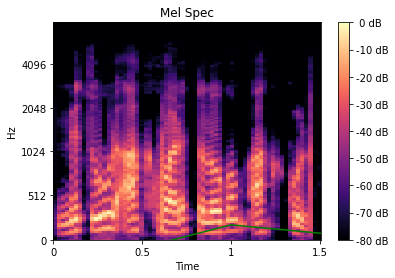

[-351.8722     156.54794    -19.411339    16.986109    -9.898065
  -16.642181     9.031425   -15.252291   -27.96184     -5.79448
  -11.529358   -20.785658    -1.9187964   -2.8496683  -10.915452
   -3.355721    -3.3422942   -6.9262137   -3.6786194   -5.6455445]


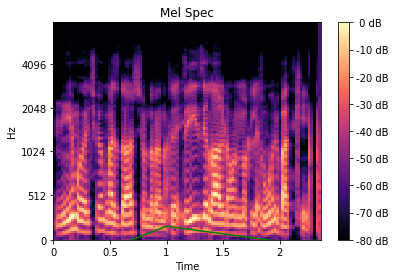

[-324.63382     176.26804     -14.976192      5.3397584    -0.71858037
    1.2738031   -11.429961    -22.29998     -20.695614    -14.430939
  -15.084923    -15.053144      2.9487495   -14.147336    -14.342311
    6.116286    -10.034075    -12.770752      1.1670852    -3.6103437 ]


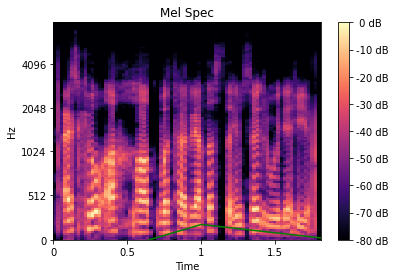

[-368.90005    149.32523     -8.162897    14.867979     3.8899066
   -5.868047    -2.530487   -19.85815    -23.305113   -11.153023
  -15.924138   -20.905933    -1.1485093   -6.463572   -16.526903
   -2.108447    -4.9270706   -7.744923    -1.6860694   -3.0237117]


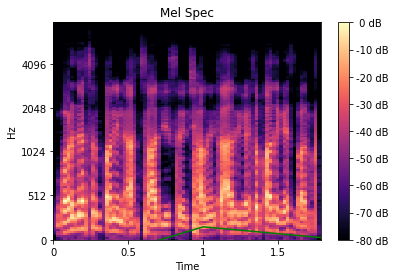

[-337.0845      172.73361     -25.132978     27.167952      6.0189495
  -11.360609      0.7348419   -16.99482     -30.270405     -8.464955
  -11.958575    -24.164146     -4.3232713    -9.183662    -11.6039
   -2.1063497    -8.005311     -4.711258      0.42523167   -5.5920043 ]


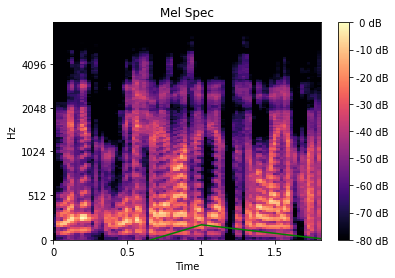

[-3.80638794e+02  1.80564529e+02 -1.13730688e+01  1.52258654e+01
 -1.33283157e+01 -1.79806995e+01  1.48682013e+01 -1.38356495e+01
 -3.87805099e+01 -1.14272442e+01 -8.41869354e+00 -1.69599648e+01
 -2.29600191e+00 -7.81673431e+00 -1.05270081e+01 -5.48270321e+00
 -8.68137360e+00 -2.49691382e-01  2.09531158e-01 -1.06173048e+01]


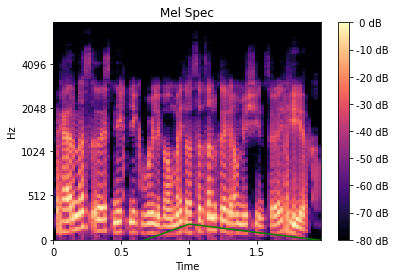

[-3.9644873e+02  1.8045299e+02 -6.2656860e+00 -2.2295574e+01
  8.2989855e+00  8.5622177e+00 -2.5182800e+01 -1.9656946e+01
 -9.3160505e+00 -1.9588976e+01 -1.6236368e+01 -5.8456526e+00
 -1.1004262e+00 -1.1571117e+01 -8.0400114e+00  5.3971291e-02
 -1.0360544e+01 -1.2274454e+01 -1.4870366e+00 -6.0862237e-01]


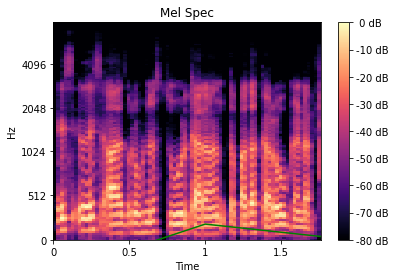

[-368.88397     153.4804      -17.686361     18.619604      3.4510787
   -1.0670928     2.1374934   -18.831186    -25.059708     -7.838586
  -11.325314    -23.169868     -0.82569855   -7.098812    -18.036484
   -2.39523      -3.1875665    -6.504094     -3.2406073    -3.2787912 ]


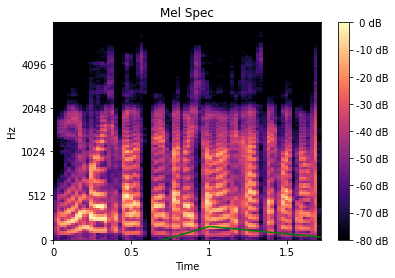

[-389.35632     169.66592      -0.80332935   -4.1943717   -10.046812
  -11.232275      7.6177783   -15.1077585   -32.02146     -10.576772
   -8.6480875   -17.30946      -4.3360853    -3.6301239    -9.505463
   -6.1650567    -6.1199145    -4.3639016    -3.6673012    -6.5638213 ]


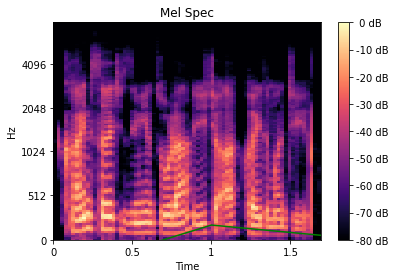

[-372.78195    183.40118    -16.329672    -9.715285    23.343695
    7.6107574  -45.364773   -22.354313    -9.098593   -15.313063
  -11.580579   -12.361342     2.3827627   -8.214375   -10.453358
    3.4234896  -13.469069   -14.929672     3.4294367   -1.9320947]


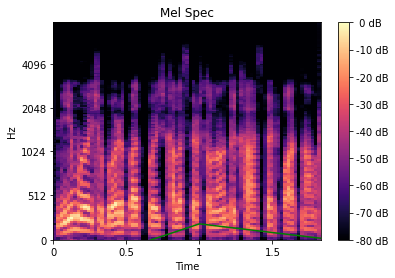

[-371.80316    180.74907    -10.934763    -3.2920902  -19.11732
  -13.597165    -5.5781574  -15.478263   -25.838366   -13.136497
   -4.4013     -15.01712     -1.7097735    2.8757074   -9.095581
   -8.265967   -11.31255    -10.68508     -1.6721449   -4.819554 ]


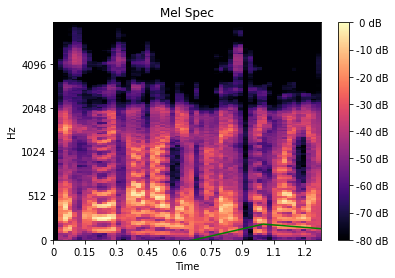

[-4.0854077e+02  1.5614748e+02  1.0679841e+01 -1.5461195e+00
  1.0988153e+01 -1.5642239e+01 -4.9978325e+01 -7.8491654e+00
  6.7035642e+00 -2.4000196e+01 -2.0423065e+01 -6.6437073e+00
 -9.5484591e-01 -9.5467453e+00 -9.3911123e+00 -6.6873536e+00
 -1.5583661e+01 -8.1747704e+00  4.6390395e+00  3.4445545e-01]


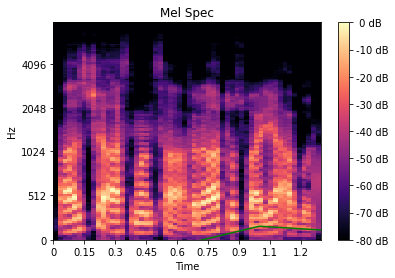

[-3.8292960e+02  1.7028972e+02 -8.4134779e+00 -9.9413586e+00
  1.8727560e+01  1.9373868e+00 -4.3014778e+01 -1.8337656e+01
 -1.8483809e+00 -2.3413738e+01 -1.4394329e+01 -6.4767599e+00
 -3.7381988e+00 -9.4051619e+00 -9.1517620e+00 -3.1902790e+00
 -1.3366042e+01 -1.0860312e+01  2.9948874e+00  2.2933491e-01]


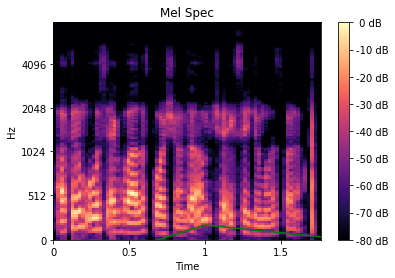

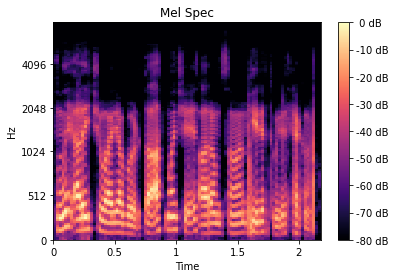

In [9]:
from matplotlib import cm
for a, s in zip(audioData, srate):
    mfcc = librosa.feature.mfcc(y=a, sr=s)
    mfccScaled = np.mean(mfcc.T, axis=0)
    print(mfccScaled)
    plt.plot(mfccScaled, 'g')
    plt.show()
    
    #mel
    melSpec = librosa.feature.melspectrogram(a, s, n_fft=2048, hop_length=1024)
    melSpec = librosa.power_to_db(melSpec, ref=np.max)
    librosa.display.specshow(melSpec, y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Mel Spec')
    plt.colorbar(format='%2.0f dB')
    



[-3.2396942e+02  1.2409280e+02  1.6034990e+01  2.0039011e+01
 -2.4941858e+01  6.4842467e+00 -1.4206708e+01  9.6147972e-01
 -1.7193151e+01 -2.1123922e+01  1.5686572e+00  6.6530337e+00
 -1.0012972e+01 -1.1402871e+01  1.8176490e+00  4.1634396e-02
 -1.1525709e+01 -2.6479018e+00 -1.7257776e+00 -1.2432575e+01]


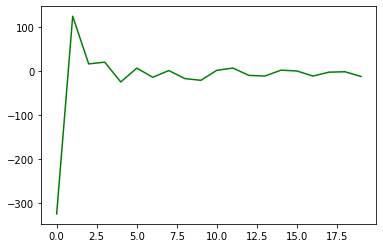

[-289.05872     119.52766       0.61751026   25.143574     -8.837141
   -4.721252    -14.853777      7.713602    -21.595467    -11.3135605
  -10.54896      -9.188004    -13.262968     -3.641518     -4.389977
    3.8128824   -13.178036     -8.076804      3.1150153    -9.982167  ]


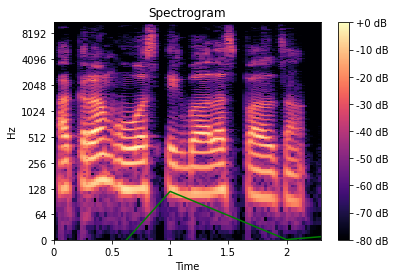

[-251.01047     109.07409      -3.5443704    20.074837     -9.201553
   12.42391     -36.817204     -7.340802    -26.9494       -2.2893372
    4.872891     -9.41966      -9.071921     -5.95577      -5.0034013
    0.39497232   -8.665024     -2.708318     -2.1622643   -11.119079  ]


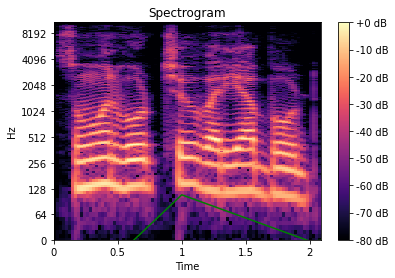

[-295.47223    118.546326     2.6246424   26.715288    -5.8767405
   -0.7054785  -26.755371    -5.467492   -25.669395    -8.099772
    7.5993104   -7.60898    -10.947257    -6.458291    -3.9599018
   -3.8416576   -6.053518    -2.858697    -3.1076126   -8.770959 ]


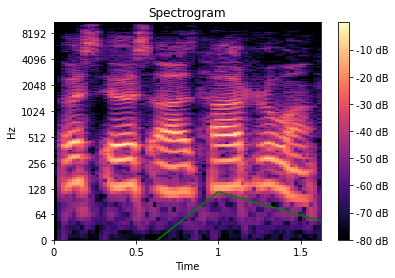

[-3.0754843e+02  8.9804840e+01  4.8680716e+00  2.9403955e+01
 -1.8607529e+00  1.5162409e+01 -3.0542185e+01 -1.0105329e+01
 -1.6269413e+01  1.6875723e-01  4.5062556e+00 -7.8507366e+00
 -8.6493826e+00 -7.8622570e+00 -5.0282679e+00  2.4879529e+00
 -5.1046715e+00 -8.1764078e+00  1.2680577e+00 -7.0719447e+00]


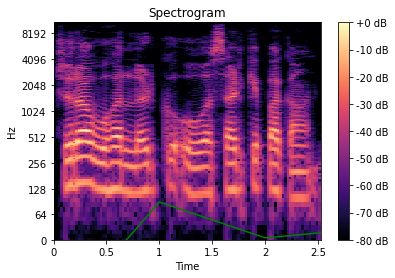

[-3.9595712e+02  6.8499855e+01  1.5653515e+01  7.4023814e+00
 -1.8469011e+01 -3.5833571e+00 -7.5625939e+00  3.6042953e+00
 -5.0195966e+00 -7.9517813e+00 -3.2005086e+00  4.0365138e+00
  1.8449072e+00 -1.0250874e+00 -5.3641000e+00 -4.2827296e+00
 -7.3063765e+00 -1.2723507e-01 -3.2704048e+00 -5.3013301e+00]


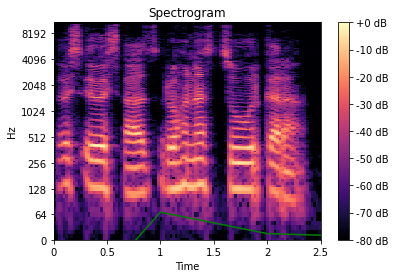

[-2.5407774e+02  8.8690308e+01  1.2461689e+01  3.2118423e+01
 -6.9996924e+00  1.4736226e+01 -2.5336849e+01 -8.2600412e+00
 -1.8836380e+01 -1.2723283e+01  1.5201569e-01 -6.0816369e+00
 -2.0511751e+01 -6.0392433e-01 -4.8098330e+00 -4.1929412e+00
 -1.1812454e+01 -4.2515936e+00 -7.3086624e+00 -3.6857028e+00]


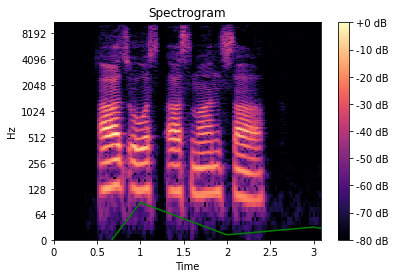

[-259.01315     99.24487      3.3806796   40.942764    -5.4468217
   15.602442   -29.38124    -12.469943   -18.331755    -6.3401895
   -9.265651   -11.339468   -12.364957    -7.086252    -4.3914933
   -2.146622    -9.879345    -4.45961     -7.9733543  -10.234742 ]


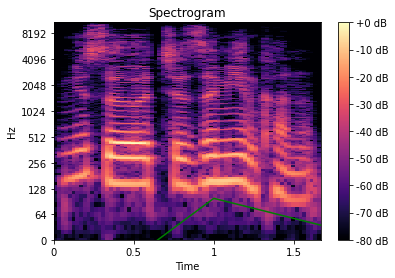

[-263.8678     113.27702      4.42195     38.75661    -15.441748
    7.206247   -22.287315    -9.591791   -20.414085    -9.487906
   -1.8302522   -5.5460706   -7.9459605   -8.455799   -10.535656
    1.5312709   -9.5074625   -6.238789    -4.010756    -3.0676587]


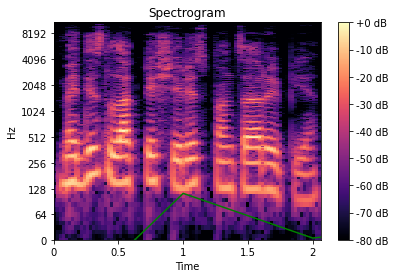

[-257.4351      108.30256      14.60987      28.73784     -32.45867
    8.733758    -27.279423     -3.8593636   -14.963292     -3.0823383
   -7.35259      -6.134252    -10.248647    -11.072055      7.483508
   -6.5545588    -8.677633     -4.920711     -3.5093026    -0.39284712]


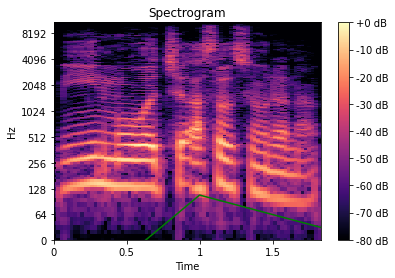

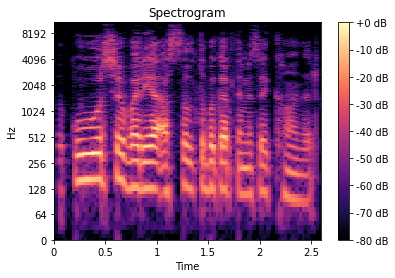

In [ ]:
for a, s in zip(audioData, srate):
    mfcc = librosa.feature.mfcc(y=a, sr=s)
    mfccScaled = np.mean(mfcc.T, axis=0)
    print(mfccScaled)
    plt.plot(mfccScaled, 'g')
    plt.show()
    #normal spect
    spec = np.abs(librosa.stft(a, hop_length=512))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    librosa.display.specshow(spec, sr=s, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram")